In [1]:
import os
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
# PVInsight Code Imports
from solardatatools import DataHandler
from solardatatools.dataio import get_pvdaq_data

In [2]:
data_frame = get_pvdaq_data(sysid=1199, year=[2015, 2016, 2017], api_key='DEMO_KEY')

[============================================================] 100.0% ...queries complete in 25.5 seconds       

CAUTION: Multiple scan rates detected!
Scan rates (in seconds): [300, 280]
0 transitions detected.
Suggest splitting data set between:




In [45]:
dh = DataHandler(data_frame)
dh.fix_dst()

In [46]:
dh.run_pipeline(power_col='ac_power', fix_shifts=False, correct_tz=False)

total time: 13.36 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              3.81s
Cleaning                   0.21s
Filtering/Summarizing      9.33s
    Data quality           0.30s
    Clear day detect       0.22s
    Clipping detect        7.79s
    Capacity change detect 1.02s



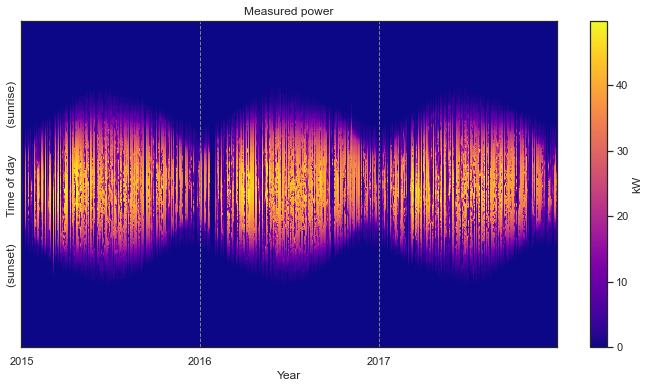

In [47]:
dh.plot_heatmap('filled');

In [53]:
dh.setup_location_and_orientation_estimation(-5)

In [54]:
dh.estimate_latitude()

39.477867597485165

In [55]:
dh.estimate_longitude()

-77.02149061524531

In [56]:
dh.setup_location_and_orientation_estimation(-5)

In [57]:
dh.estimate_latitude()

39.48011432047507

In [58]:
dh.estimate_longitude()

-77.02773892637121

In [43]:
dh.estimate_longitude()

-76.99497716211415

In [44]:
dh.estimate_longitude()

-76.99497716211415

In [11]:
# actual site location 
lat_actual = 39.4856
lon_actual = -76.6636
dh.estimate_orientation(latitude=lat_actual, longitude=lon_actual)

(37.83464950799888, -0.9222505405437297)

In [12]:
dh.estimate_orientation()

(37.834704856913405, -1.5056045273181193)

In [13]:
dh.estimate_location_and_orientation()

(39.339893264226376,
 -77.02669236001245,
 37.69707468705119,
 -1.5188203396734161)